In [1]:
import pandas as pd
import numpy as np
import calendar
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import SnowballStemmer
#from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import re

import spacy
import matplotlib.pyplot as plt
import es_core_news_sm

c:\Users\danie\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
#Cargo el archivo csv con los tweets y genero un dataframe
df_Barcelona=pd.read_csv(r"C:\Users\danie\Desktop\Apuntes\M5-Inteligencia de negocio y visualización\Práctica final\tweets_Barcelona.csv")
df_Madrid=pd.read_csv(r"C:\Users\danie\Desktop\Apuntes\M5-Inteligencia de negocio y visualización\Práctica final\tweets_Madrid.csv")

**Para el caso de Madrid**

In [3]:
nlp = spacy.load('es_core_news_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
#df_Madrid['lemmatized']=df_Madrid['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


c:\Users\danie\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:
#Limpio el texto en 4 pasos:

texto = []

for i in df_Madrid['text']:
    texto.append(i)
str_texto = "".join(texto)
#str_texto


#Elimino emojis y símbolos
def Emojify(_texto):
    regrex_pattern = re.compile(pattern ="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',str_texto)
str_texto=Emojify(str_texto)


#Elimino urls
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
str_texto = re.sub(pattern,'',str_texto)

#Elimino palabras de menos de 4 letras para quitarme algunos pronombres y determinantes
str_texto=re.sub(r'\b\w{1,3}\b', '', str_texto)

In [5]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(str_texto)


In [7]:
nombres=[doc.text for doc in nlp(str_texto) if doc.is_stop!=True and doc.is_punct!=True and doc.pos_=='NOUN']

str_nombres=" ".join(nombres)
#print(str_nombres)

In [8]:
#Muestro las veces que se repiten las palabras seleccionadas
frecuencias=nltk.FreqDist(nombres)
frecuencias

FreqDist({'aeropuerto': 154, 'aviones': 101, 'creadores': 100, 'médicos': 88, 'centro': 56, 'salud': 56, 'problema': 45, '@javierpadillab': 37, 'flagrancia': 26, 'kilos': 26, ...})

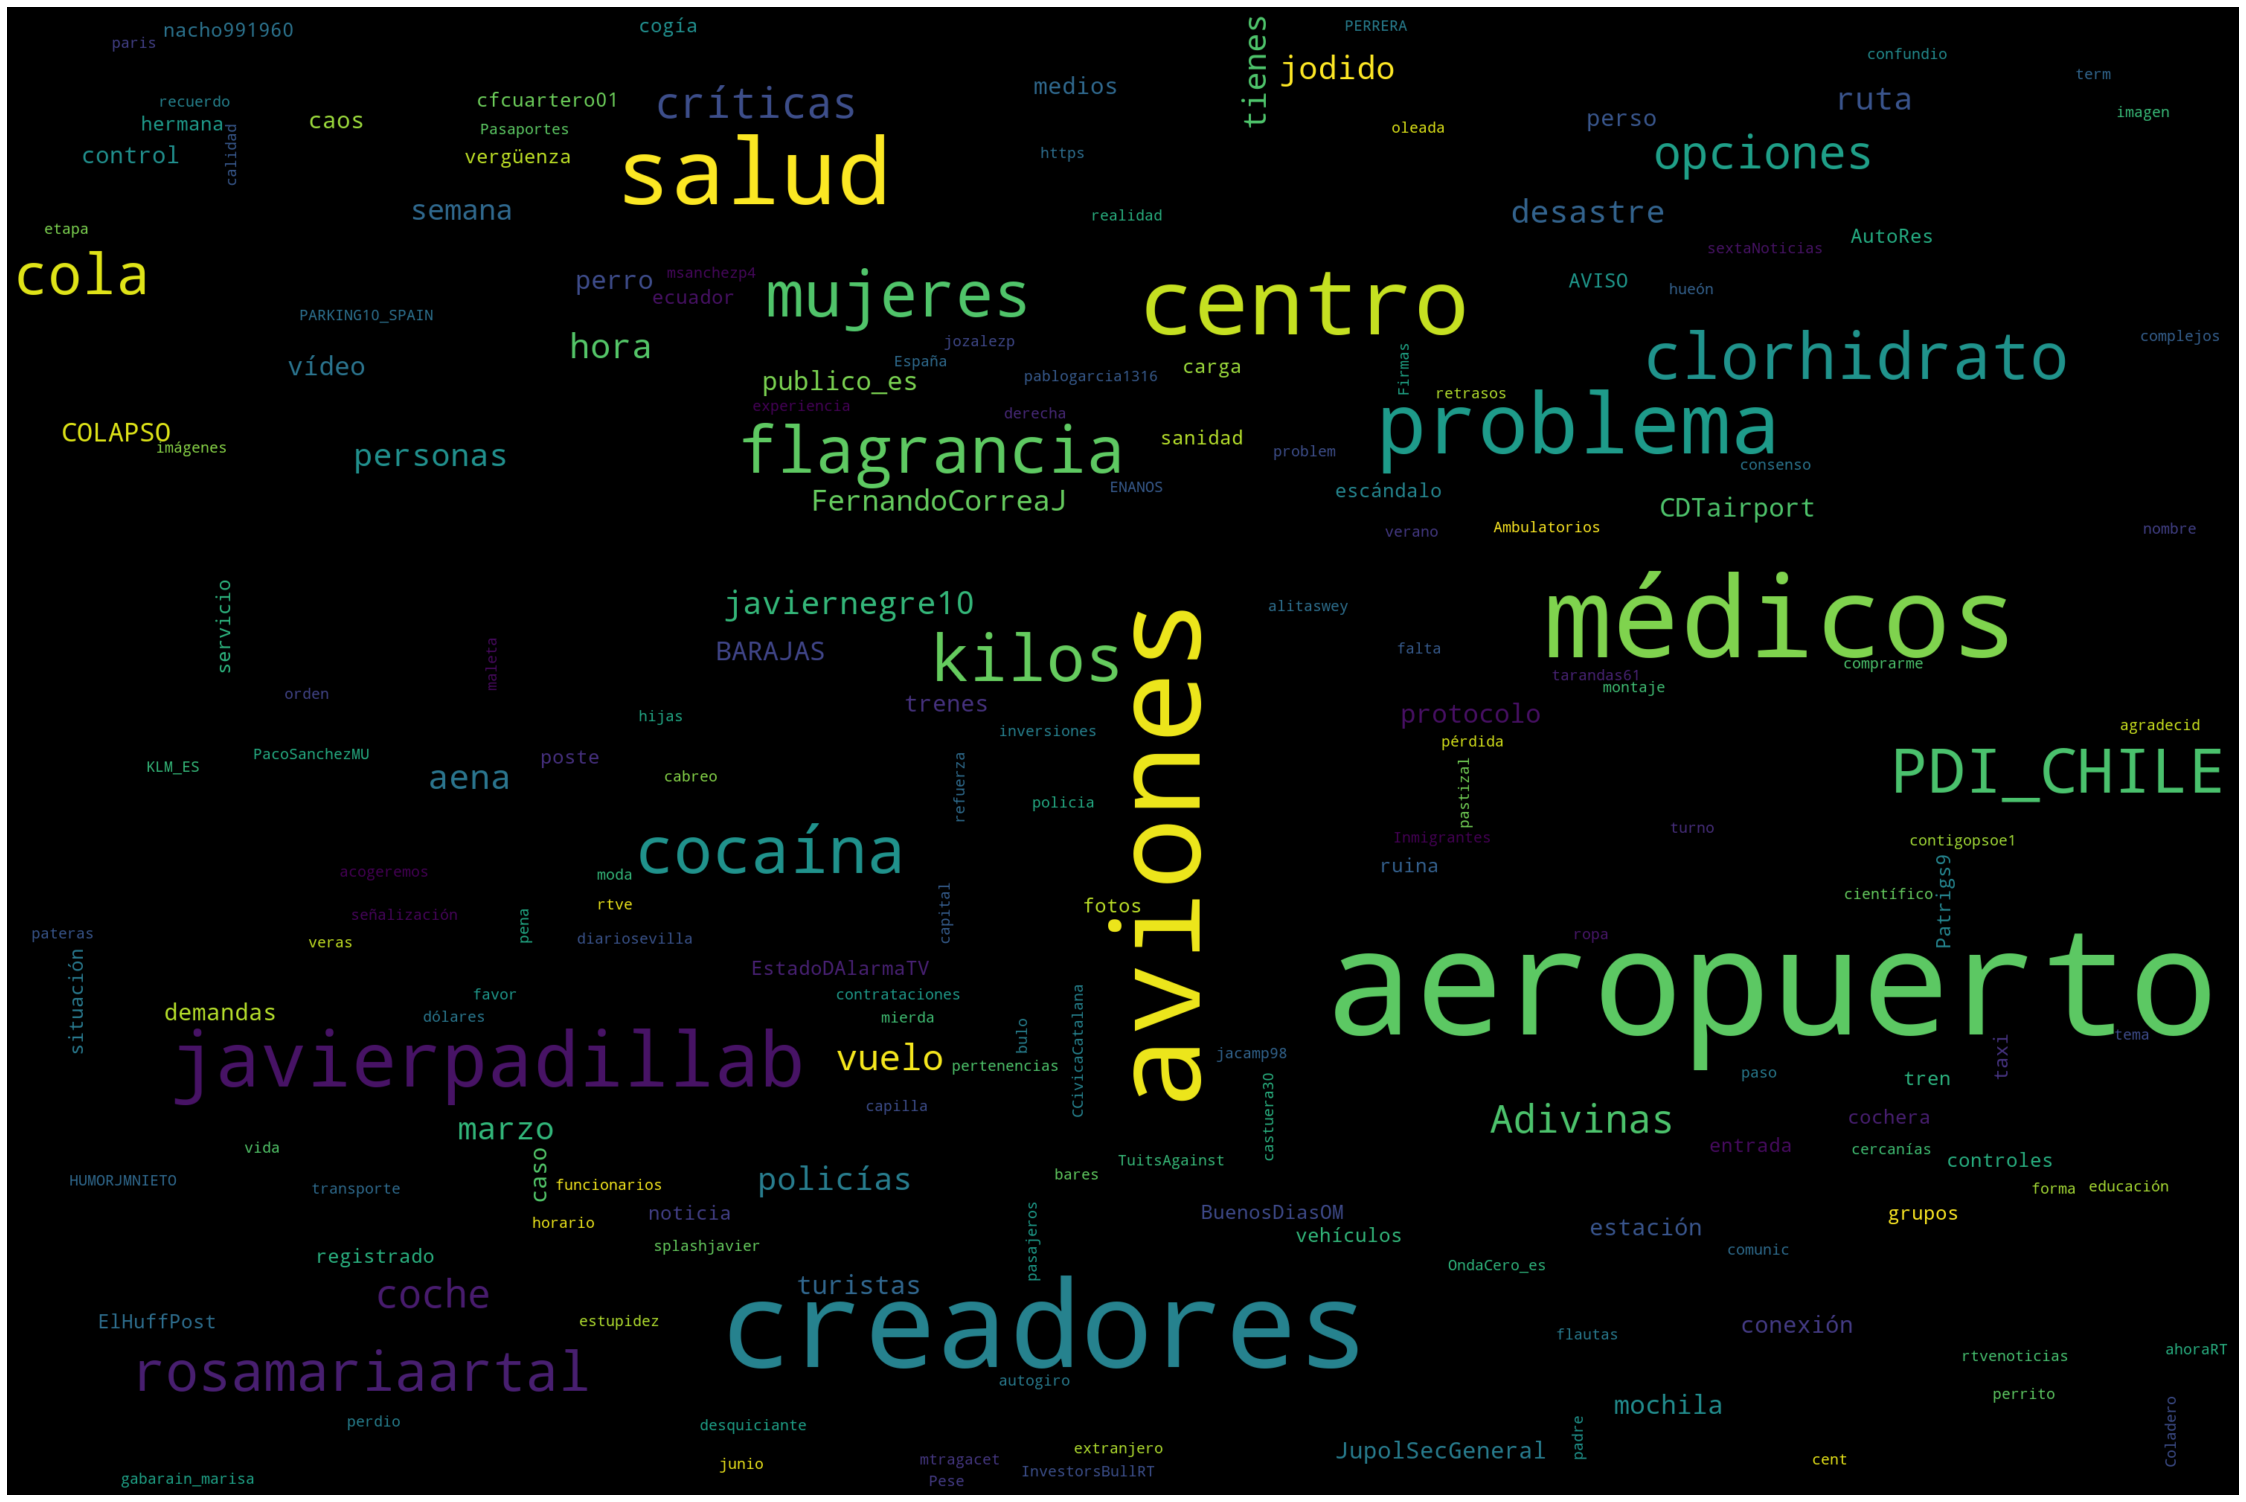

In [9]:
#Genero un gráfico Word Cloud solo con Nombres.

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_nombres)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
#Selecciono los adjetivos seleccionados
adj=[doc.text for doc in nlp(str_texto) if doc.is_stop!=True and doc.is_punct!=True and doc.pos_=='ADJ']

str_adj=" ".join(adj)
#print(str_adj)

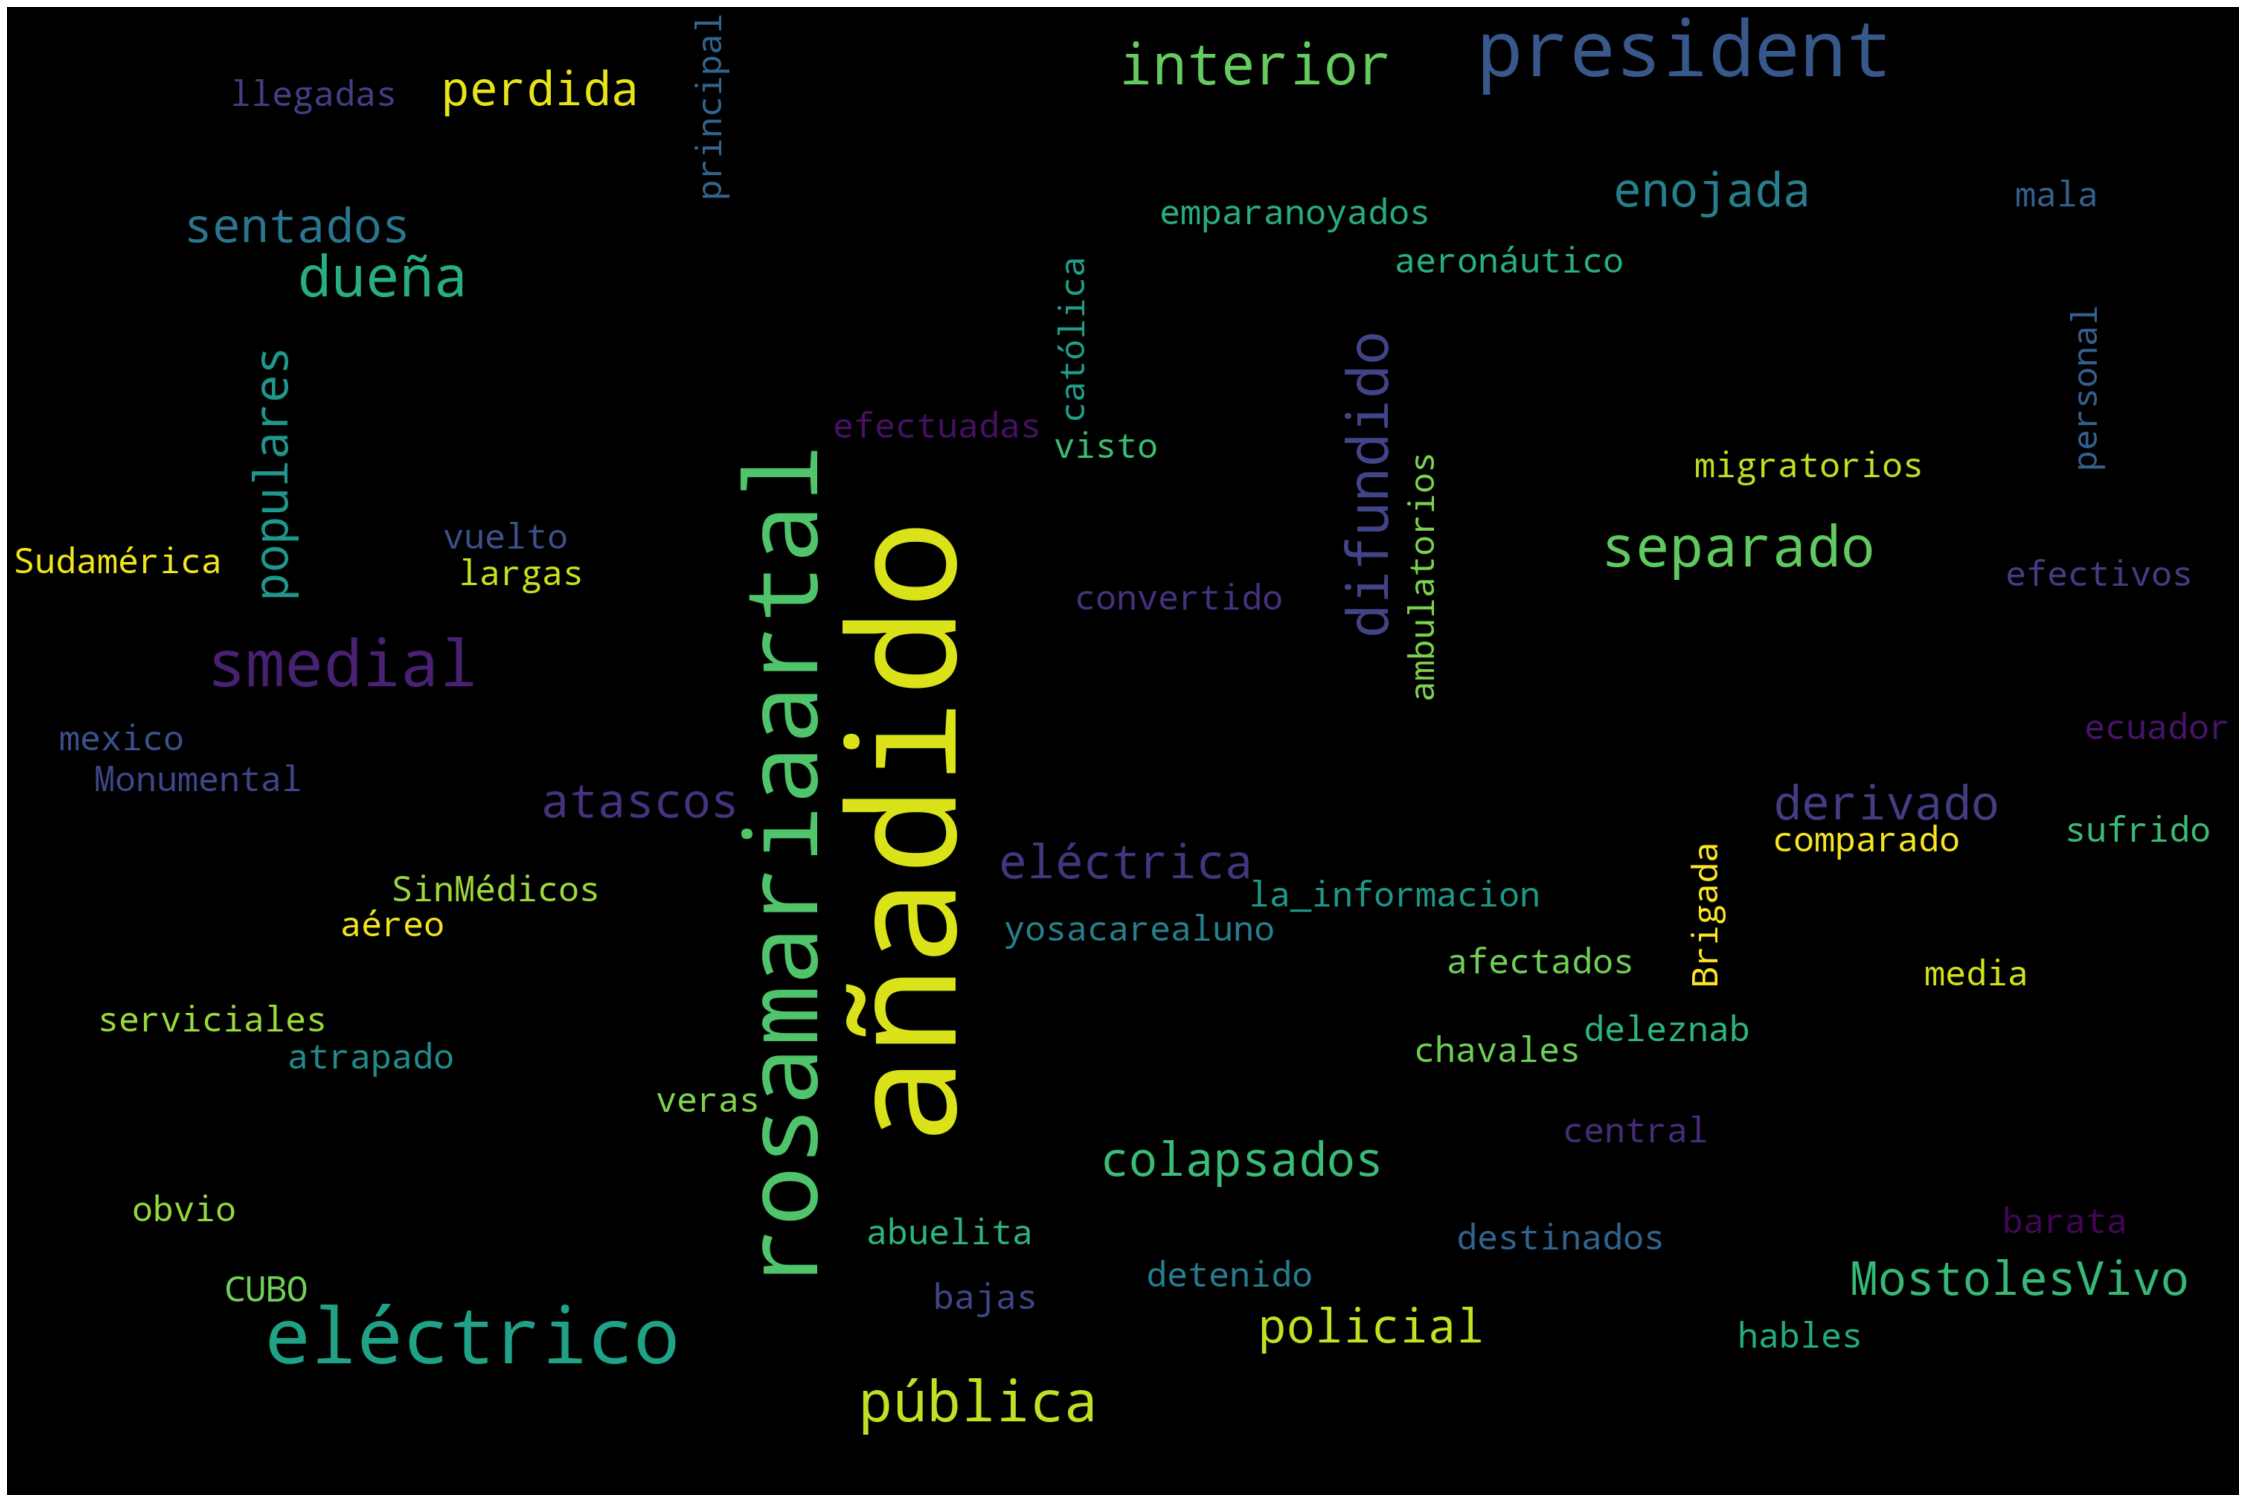

In [11]:
#Genero un gráfico Word Cloud solo con Adjetivos.

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_adj)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

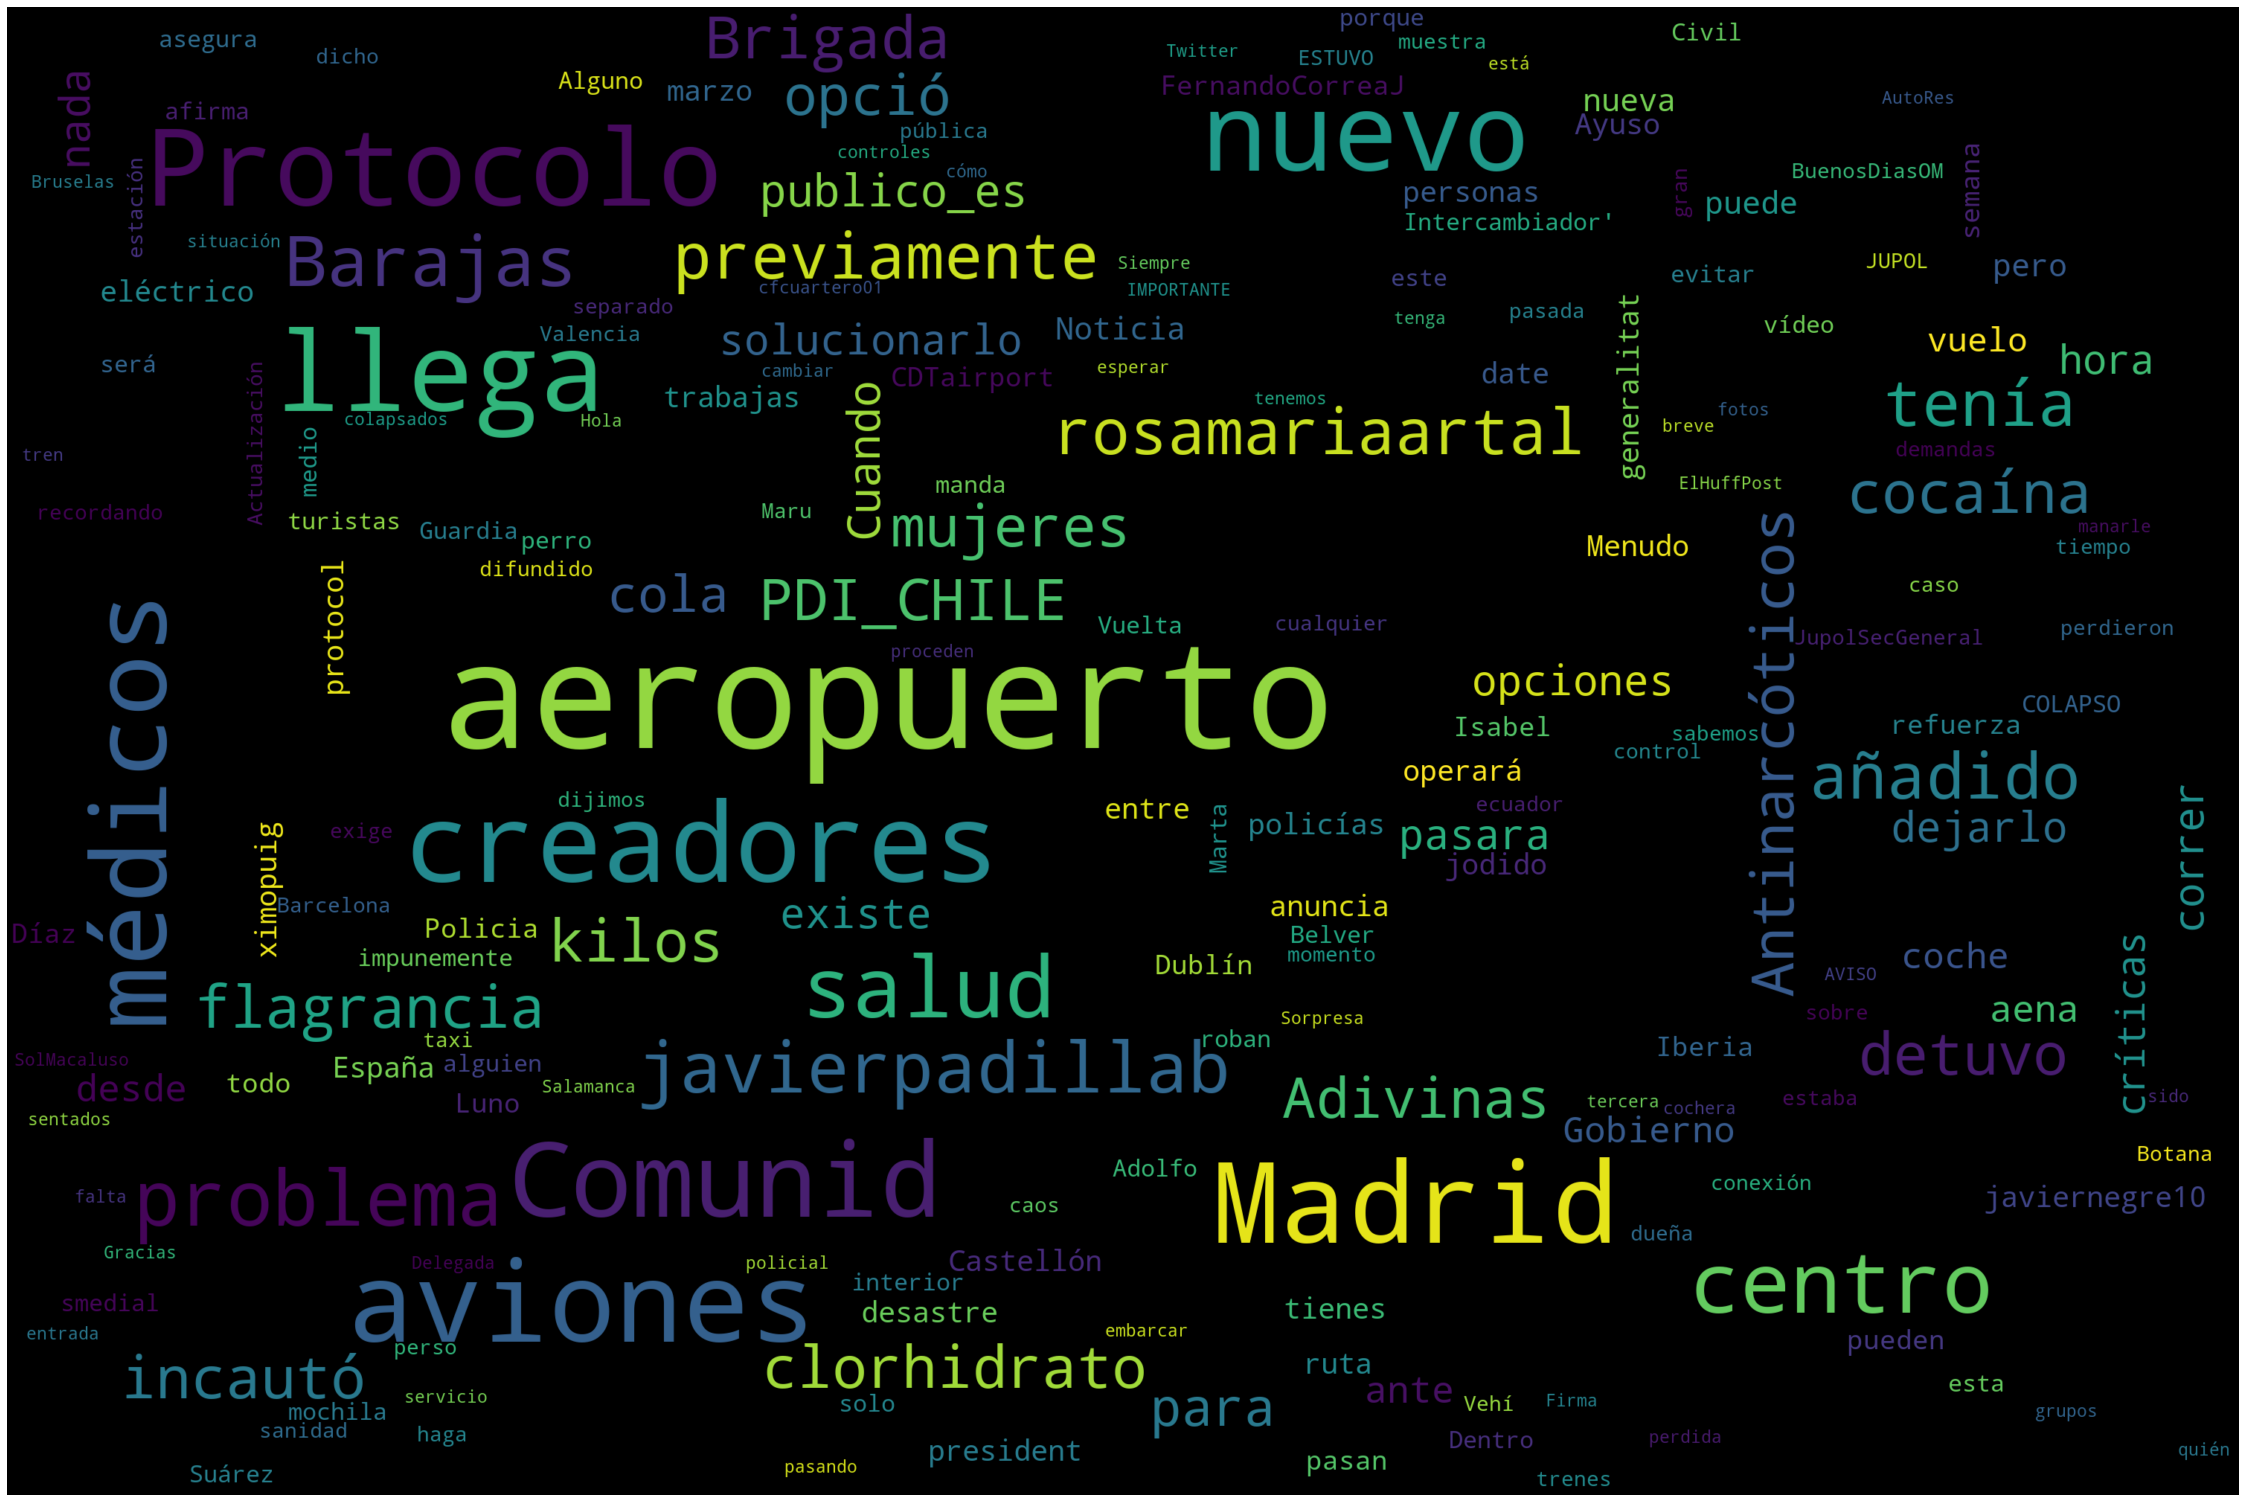

In [12]:
#Genero un gráfico Word Cloud con todas las palablas

stopwords = set(STOPWORDS)
stopwords.update(["pues","casi","ahora","hace","esto", "como","hacer","tiene","hace"]) #Palabras que no quiero que aparezcan

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_texto)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Para el caso de Barcelona**

In [13]:
#Limpio el texto en 4 pasos:

texto = []

for i in df_Barcelona['text']:
    texto.append(i)
str_texto = "".join(texto)
#str_texto


#Elimino emojis y símbolos
def Emojify(_texto):
    regrex_pattern = re.compile(pattern ="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',str_texto)
str_texto=Emojify(str_texto)


#Elimino urls
pattern = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
str_texto = re.sub(pattern,'',str_texto)

#Elimino palabras de menos de 4 letras para quitarme algunos pronombres y determinantes
str_texto=re.sub(r'\b\w{1,3}\b', '', str_texto)

In [14]:
nlp = spacy.load("es_core_news_sm")
doc = nlp(str_texto)

c:\Users\danie\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [15]:
nombres=[doc.text for doc in nlp(str_texto) if doc.is_stop!=True and doc.is_punct!=True and doc.pos_=='NOUN']

str_nombres=" ".join(nombres)
#print(str_nombres)

In [16]:
#Muestro las veces que se repiten las palabras seleccionadas
frecuencias=nltk.FreqDist(nombres)
frecuencias

FreqDist({'@CCivicaCatalana': 25, 'Aeropuerto': 25, 'científico': 25, 'autogiro': 25, 'aeropuerto': 11, 'reportero': 5, '@ecuavisa': 4, '@ReginadelC': 2, 'reactivación': 2, 'importaciones': 2, ...})

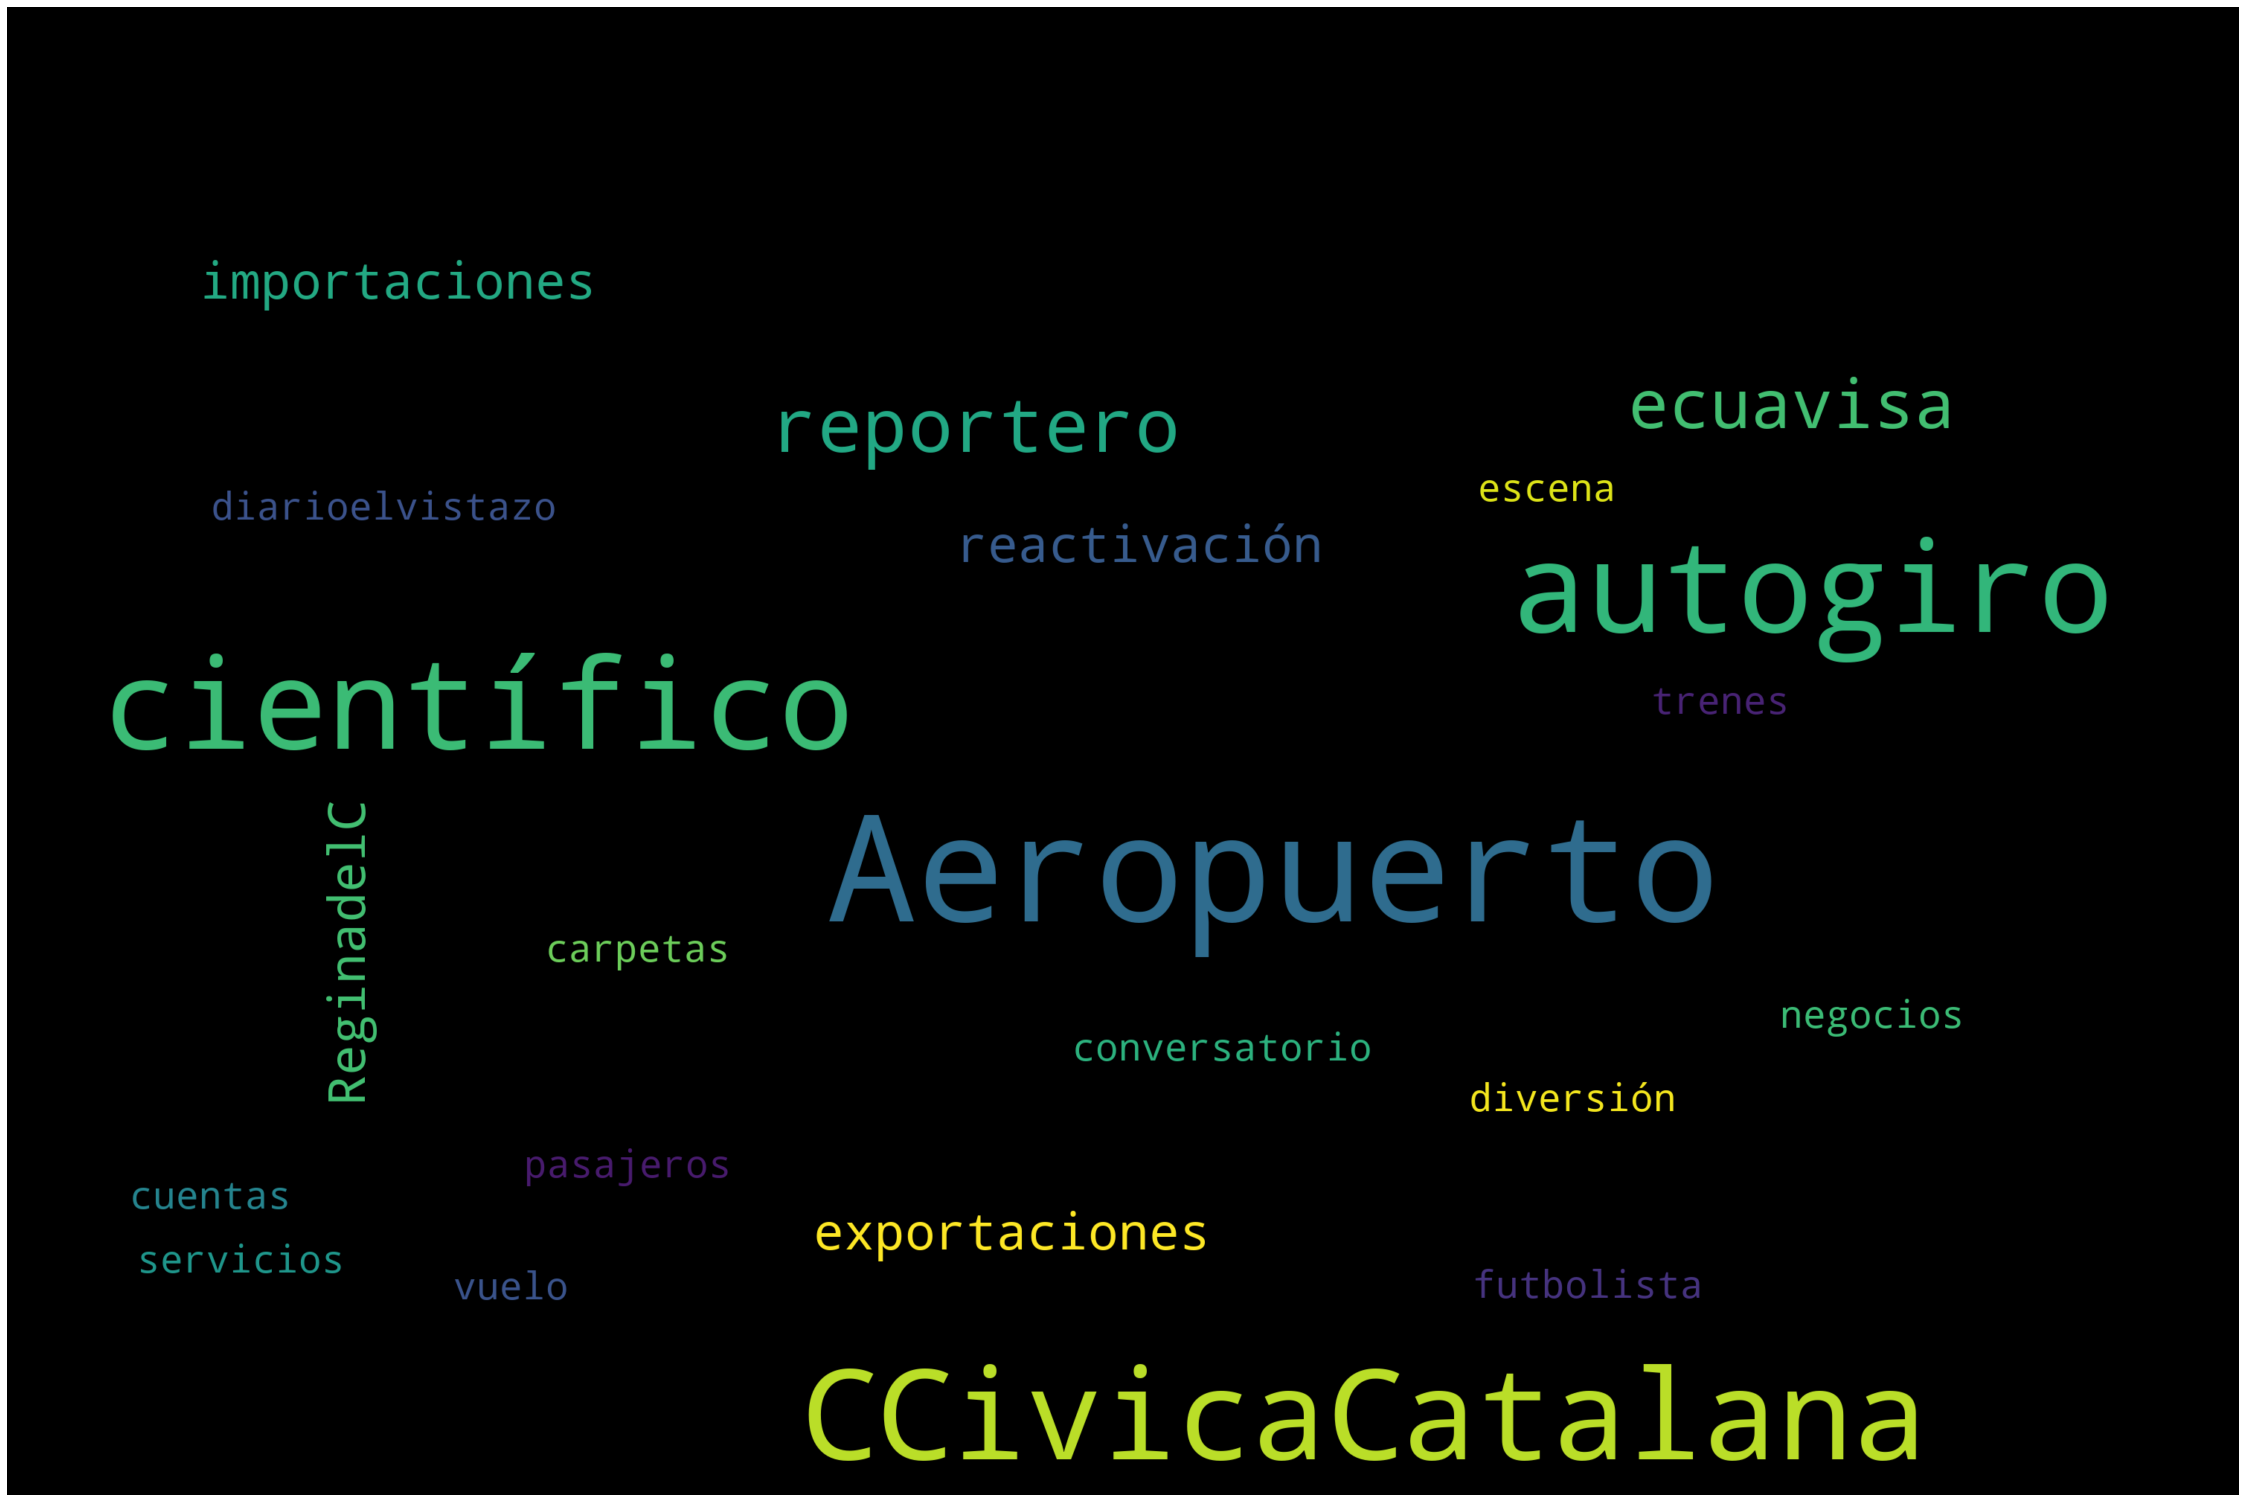

In [17]:
#Genero un gráfico Word Cloud solo con Nombres.

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_nombres)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
#Selecciono los adjetivos seleccionados
adj=[doc.text for doc in nlp(str_texto) if doc.is_stop!=True and doc.is_punct!=True and doc.pos_=='ADJ']

str_adj=" ".join(adj)
#print(str_adj)

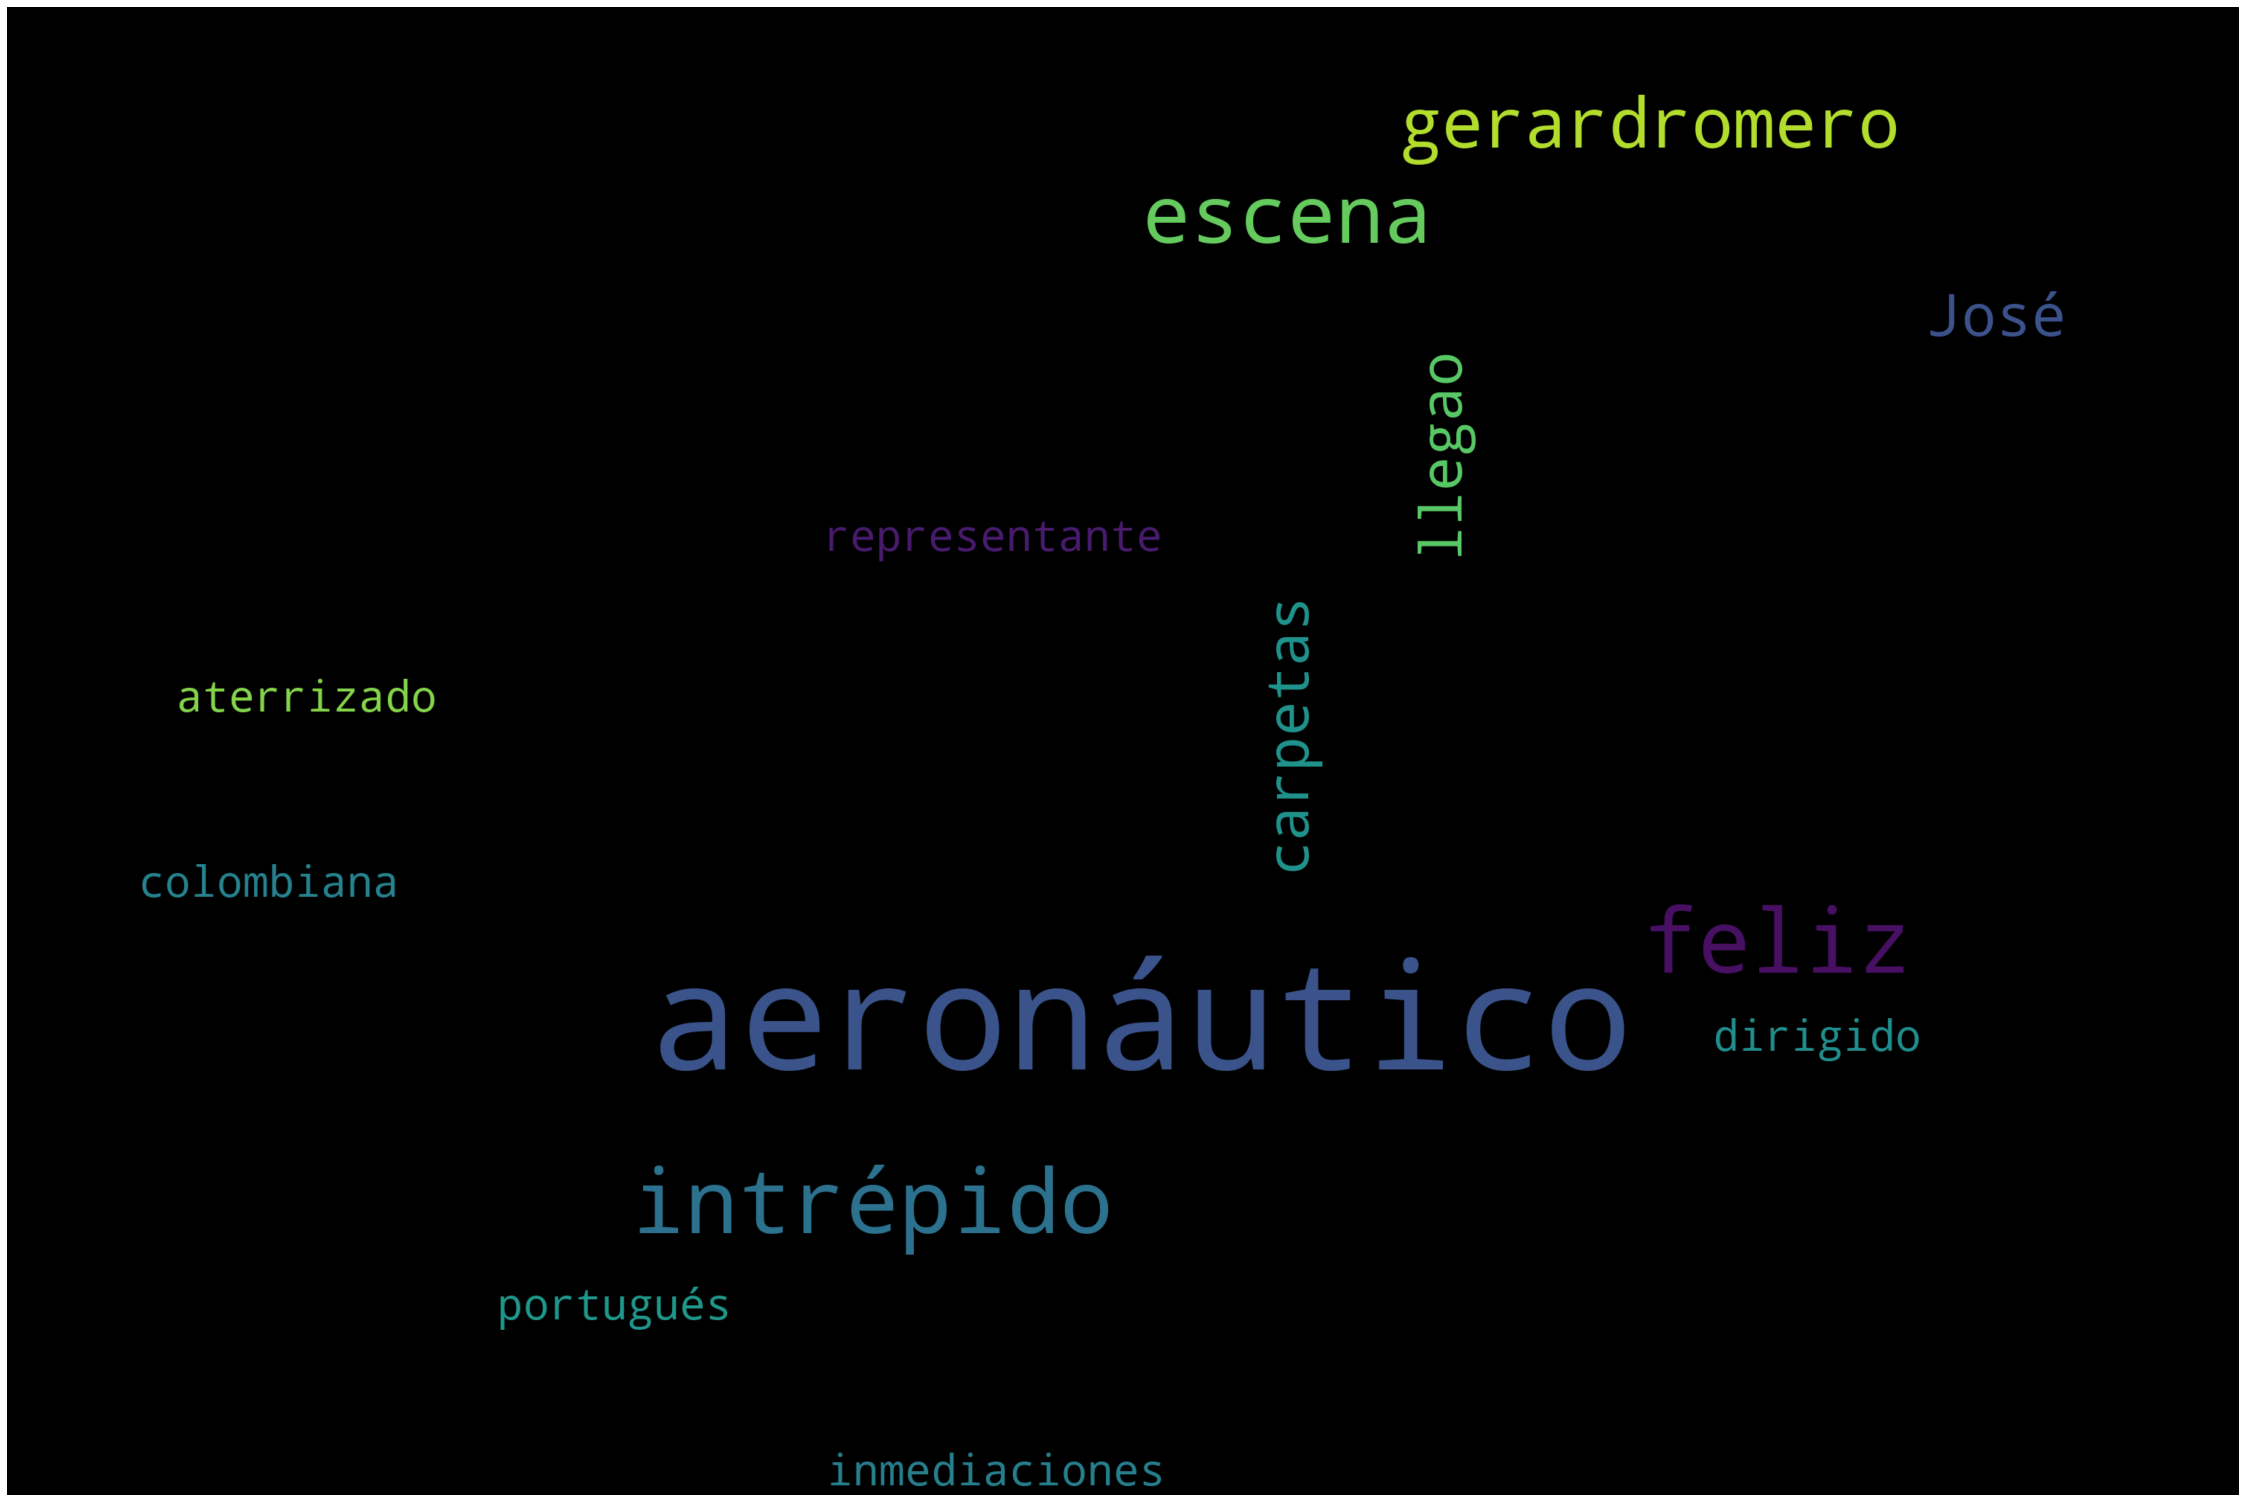

In [19]:
#Genero un gráfico Word Cloud solo con Adjetivos.

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_adj)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

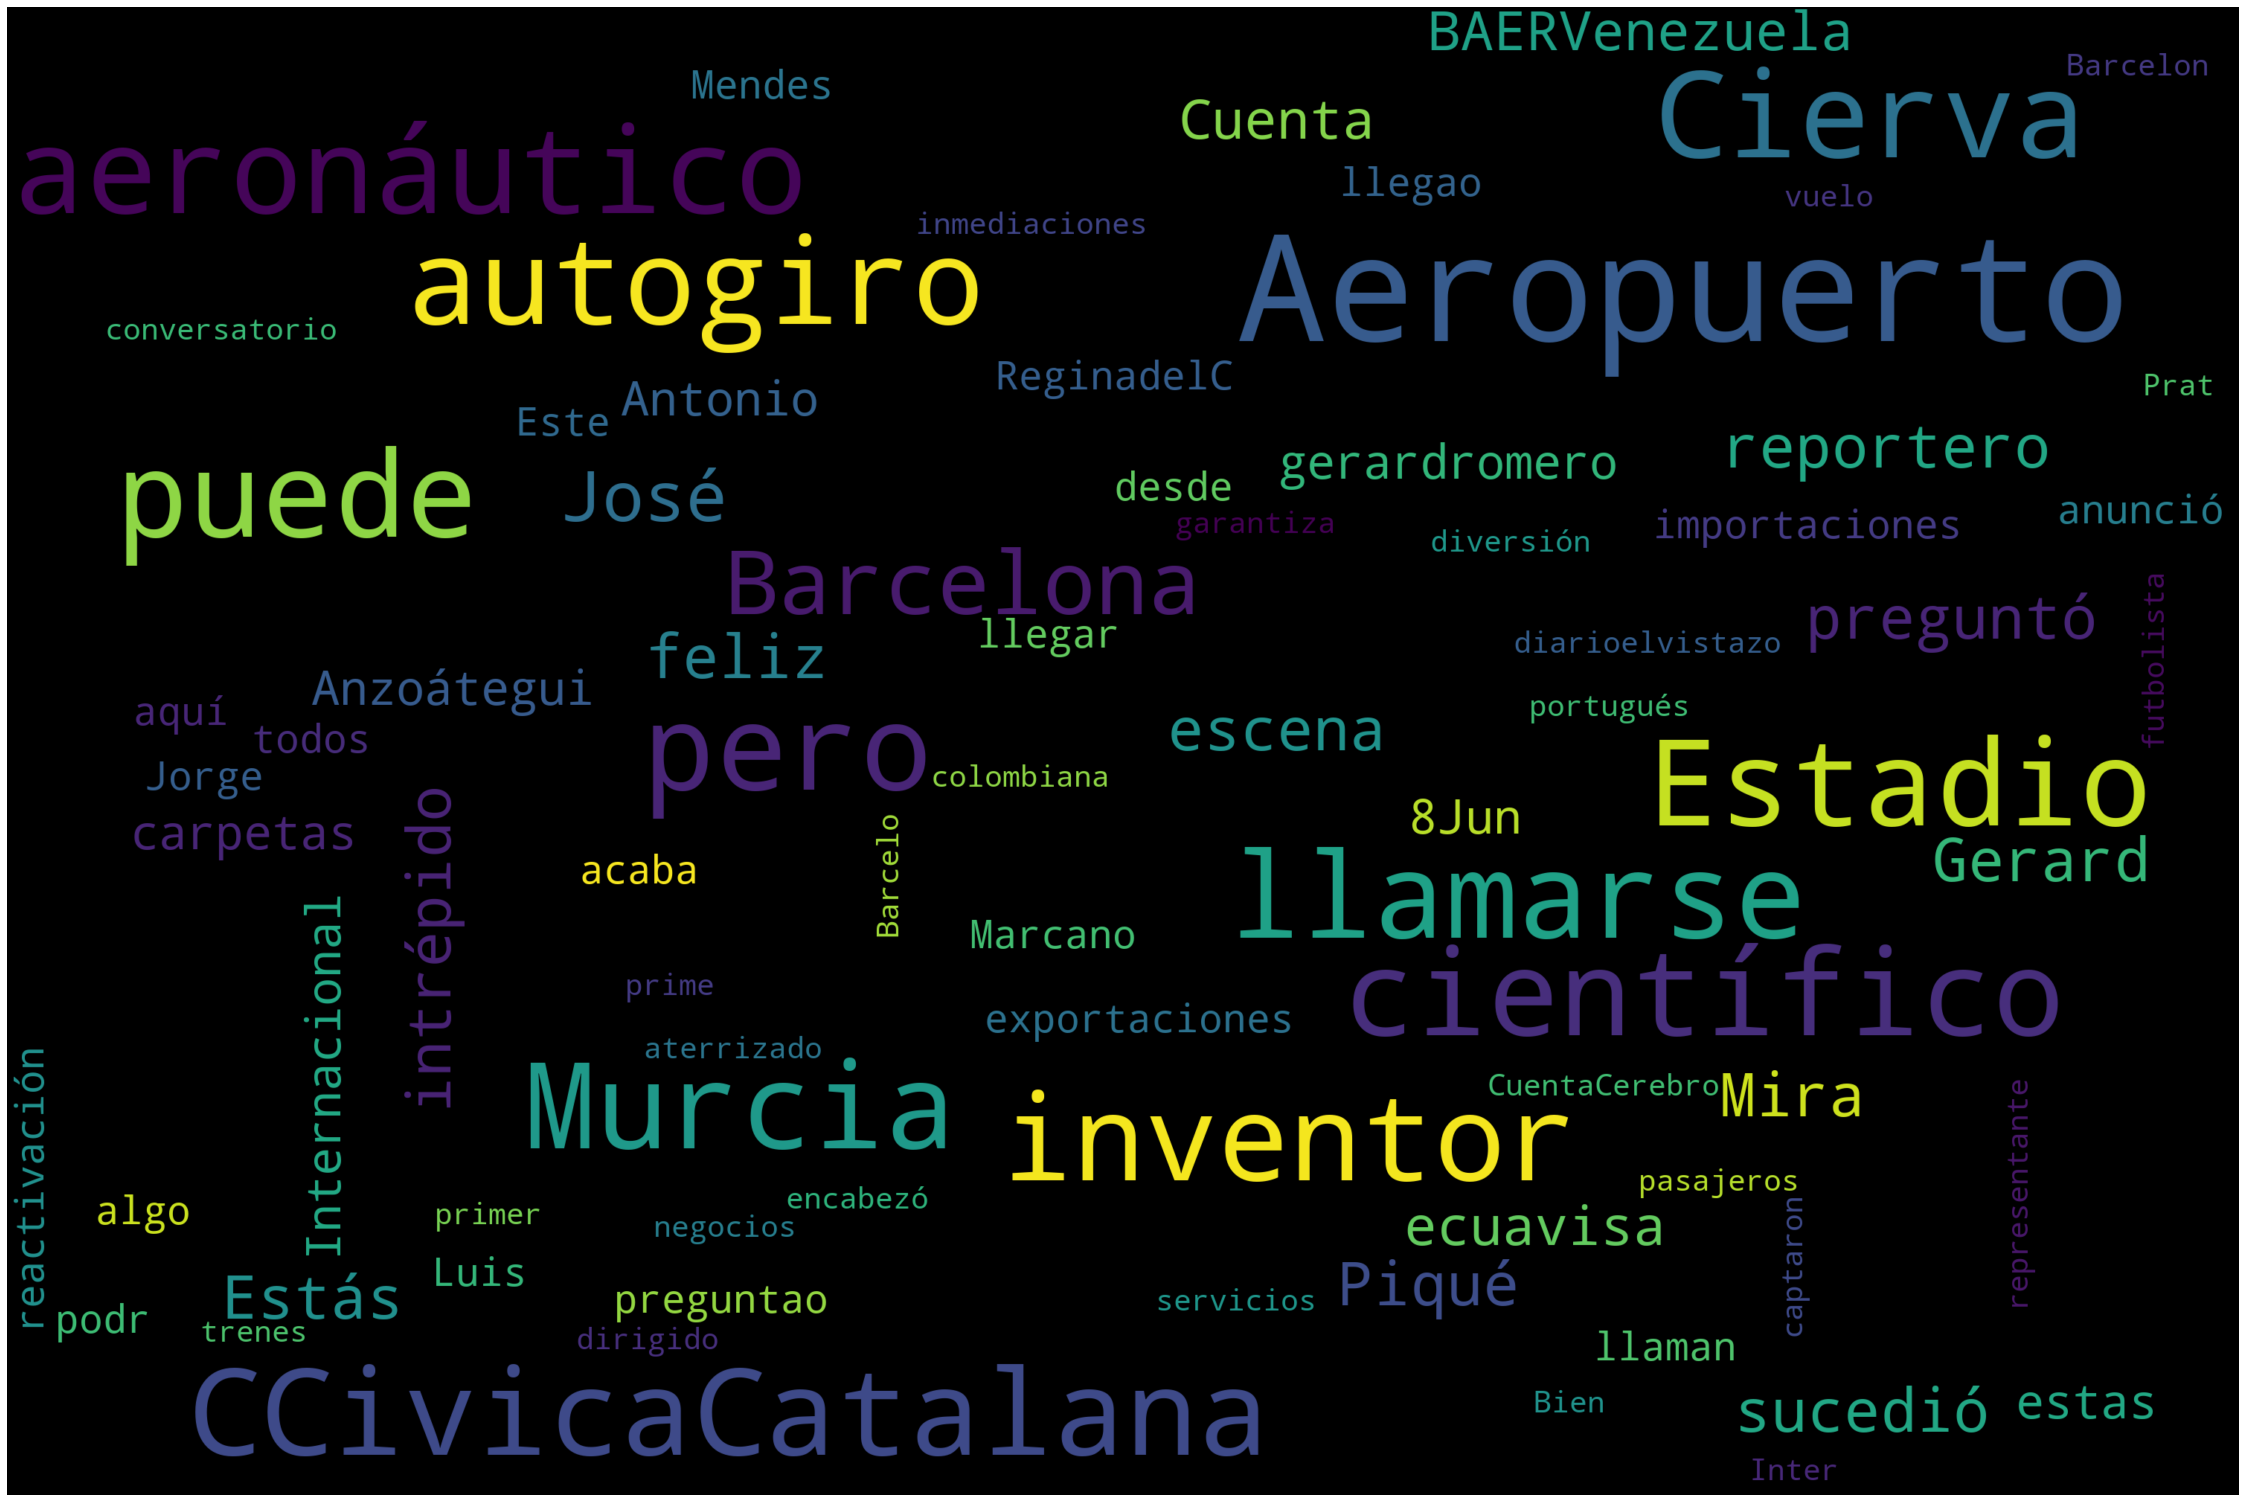

In [20]:
#Genero un gráfico Word Cloud con todas las palablas

stopwords = set(STOPWORDS)
stopwords.update(["pues","casi","ahora","hace","esto", "como","hacer","tiene","hace"]) #Palabras que no quiero que aparezcan

wordcloud = WordCloud(width=3000, stopwords=stopwords,height=2000,max_font_size=200,collocations=False, background_color='black').generate(str_texto)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()